<a href="https://colab.research.google.com/github/Olesiewitch/Predictive_Analytics/blob/master/APA_Econml_Hilstrom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Main imports 

!pip install econml
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner
from econml.dml import LinearDMLCateEstimator, ForestDMLCateEstimator
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline 

dataurl='https://raw.githubusercontent.com/Olesiewitch/Predictive_Analytics/master/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv'

     |████████████████████████████████| 317kB 2.7MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
     |████████████████████████████████| 6.7MB 10.5MB/s 
     |████████████████████████████████| 110.5MB 45kB/s 
     |████████████████████████████████| 512kB 34.2MB/s 
     |████████████████████████████████| 3.8MB 46.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=2513dcc2d599c7e2737f861dd82742fb6773e58de269d649543b3ffcf6847751
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: sparse 0.10.0 has requirement numba>=0.49, but you'll have numba 0.48.0 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existi

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv(dataurl)

In [0]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})

In [4]:
df.keys()

Index(['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code',
       'newbie', 'channel', 'segment', 'visit', 'conversion', 'spend'],
      dtype='object')

In [5]:
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  object 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  object 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  object 
 8   segment          64000 non-null  object 
 9   visit            64000 non-null  int64  
 10  conversion       64000 non-null  int64  
 11  spend            64000 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 5.9+ MB


In [10]:
df['segment'].head()

0    Womens E-Mail
1        No E-Mail
2    Womens E-Mail
3      Mens E-Mail
4    Womens E-Mail
Name: segment, dtype: object

In [0]:
def generate_feature_repr(values):
  feature_names = list(set(values))
  feature_names.sort()
  feature_values = []
  for feature_name in feature_names:
      value = values[values==feature_name].shape[0]
      feature_values.append(value)
  return pd.DataFrame(data={
      'Name': feature_names,
      'Value':feature_values
  })

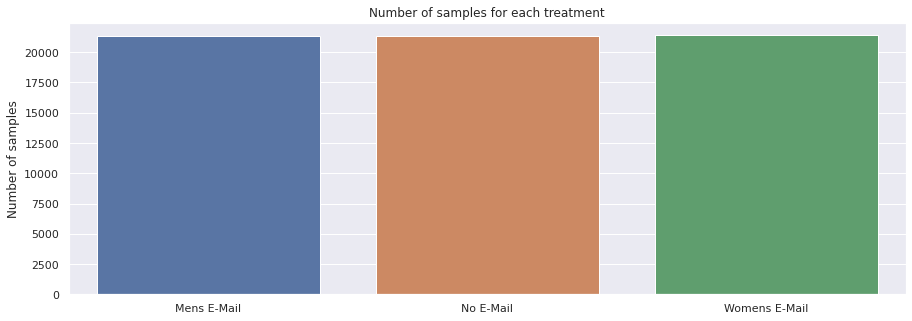

In [9]:
df_repr= generate_feature_repr(df['segment'])
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='',
    ylabel='Number of samples',
    title='Number of samples for each treatment'
);

In [10]:
# Inspect Target Variable
# Target variable -spend

target=df['spend']
non_zero = target[target !=0].shape[0]

print("{}% - of samples actually spent". format(100 * non_zero / target.shape[0]))


0.903125% - of samples actually spent


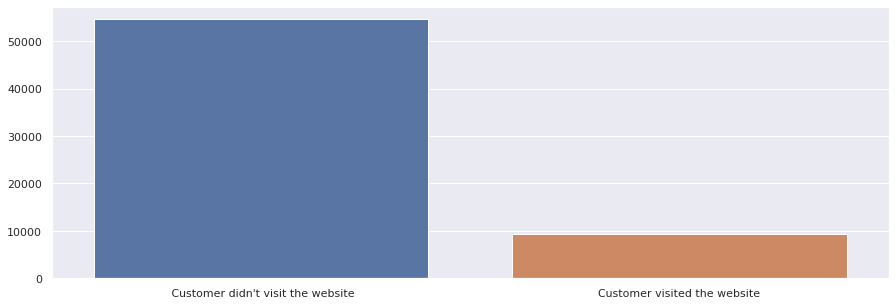

In [11]:
# TARGET VARIABLE- VISIT
# 1/0 INDICATOR, 1 = Customer visited webiste in the following two weeks

df_repr = generate_feature_repr(df['visit'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Customer visited the website' if x else 
                                        " Customer didn't visit the website")
ax= sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');


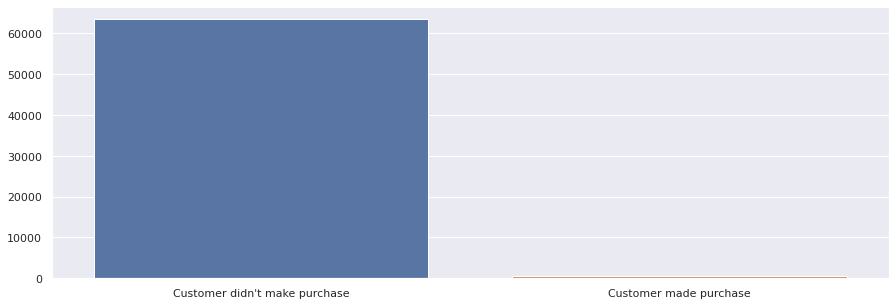

In [12]:
#  Target Variable -Conversion:

df_repr= generate_feature_repr(df['conversion'].values)
df_repr['Name']=df_repr['Name'].apply(lambda x: 'Customer made purchase' if x else "Customer didn't make purchase")
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

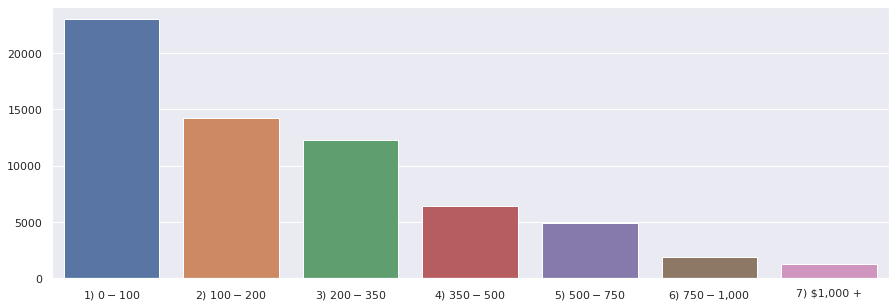

In [13]:
# Inspect Features
# Feature: History_segment

df_repr = generate_feature_repr(df['history_segment'].values)
ax=sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

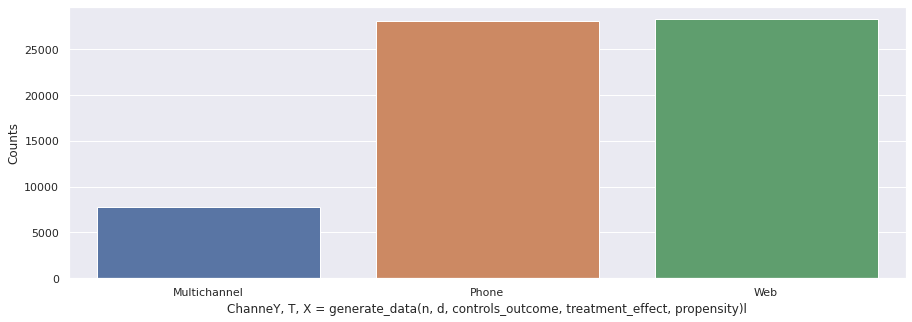

In [14]:
df_repr = generate_feature_repr(df['channel'].values)
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='ChanneY, T, X = generate_data(n, d, controls_outcome, treatment_effect, propensity)l', ylabel='Counts', title='');

In [15]:
df['history_segment'].head()

0    2) $100 - $200
1    3) $200 - $350
2    2) $100 - $200
3    5) $500 - $750
4      1) $0 - $100
Name: history_segment, dtype: object

In [0]:
# data cleaning

df['history_segment'] = df['history_segment'].apply(lambda s: s.split(') ')[1])
df['history_segment'] = df['history_segment'].astype(str)
df['history_segment'] = [i.replace('$', '').replace(',', '').replace('-', '_').replace(' ', '') for i in df['history_segment']]


In [10]:
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,100_200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,200_350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,100_200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,500_750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,0_100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


In [0]:
# column types to numeric??

# Rename columns 
df = df.rename(columns= {'segment' : 'Treatment'})

# Create dummy columns
dummy_cols = ['zip_code', 'history_segment', 'channel']
for col in dummy_cols:
  df = pd.get_dummies(df, columns=[col], prefix=col)

# Encode the 'Treatment' Column

treatment_encoder = {'No E-Mail': 0, 'Mens E-Mail': 1, 'Womens E-Mail': 2}
df['Treatment'] = df['Treatment'].apply(lambda x: treatment_encoder[x])

In [18]:
df.shape

(64000, 22)

In [19]:
pd.crosstab(df['visit'],df['Treatment'], margins= True)

Treatment,0,1,2,All
visit,,,,
0,19044,17413,18149,54606
1,2262,3894,3238,9394
All,21306,21307,21387,64000


In [20]:
df.pivot_table(values=['visit', 'conversion','spend'],
               index = 'Treatment',
               aggfunc=[np.mean],
               margins = True)


mean                    
          conversion     spend     visit
Treatment                               
0           0.005726  0.652789  0.106167
1           0.012531  1.422617  0.182757
2           0.008837  1.077202  0.151400
All         0.009031  1.050908  0.146781

In [21]:
df.head()

,recency,history,mens,womens,newbie,Treatment,visit,conversion,spend,zip_code_Rural,zip_code_Surburban,zip_code_Urban,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",channel_Multichannel,channel_Phone,channel_Web
0,10,142.44,1,0,0,2,0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,6,329.08,1,1,1,0,0,0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,7,180.65,0,1,1,2,0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,9,675.83,1,0,1,1,0,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,2,45.34,1,0,0,2,0,0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1


In [0]:
# Normalize data

normalization_fields = ['recency', 'history']
df[normalization_fields] = (df[normalization_fields] - df[normalization_fields].mean()) / df[normalization_fields].std()

In [15]:
df.head()

,recency,history,mens,womens,newbie,Treatment,visit,conversion,spend,zip_code_Rural,zip_code_Surburban,zip_code_Urban,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",channel_Multichannel,channel_Phone,channel_Web
0,1.207742,-0.389000,1,0,0,2,0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,0.067358,0.339611,1,1,1,0,0,0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0.352454,-0.239834,0,1,1,2,0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,0.922646,1.693265,1,0,1,1,0,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,-1.073025,-0.768062,1,0,0,2,0,0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1


In [58]:
# Define estimator inputs

Y = df['visit'].values # outcome of interest
T = df['Treatment'].values # treatment
X = df.drop(columns=["visit","Treatment", "conversion", "spend"]).values  # features 
Y.shape


(64000,)

In [35]:
# Data Preparation

control_indexs = [i for i, e in enumerate(T) if e==0]
men_indexs = [i for i, e in enumerate (T) if e==1]
women_indexs = [i for i, e in enumerate (T) if e==2]

len(control_indexs)

21306

In [63]:
# Split the dataset into Control group and Women/Men campaign group
X_control = X[control_indexs]
Y_control = Y[control_indexs]
T_control = T[control_indexs]

X_women = X[women_indexs]
Y_women = Y[women_indexs]
T_women = T[women_indexs]

X_women.shape

X_men = X[men_indexs]
Y_men = Y[men_indexs]
T_men = T[men_indexs]

X_men.shape




(21307, 18)

In [64]:
X_split = np.append(X_control, X_men, axis=0)
Y_split = np.append(Y_control, Y_men, axis =0)
T_split = np.append(T_control, T_men, axis= 0)

X_split.shape, Y_split.shape, T_split.shape


((42613, 18), (42613,), (42613,))

In [0]:
X_train, X_test, Y_train, Y_test, T_train, T_test = train_test_split(X_split, Y_split, T_split, 
                                                                     test_size=0.3, random_state=2002, 
                                                                    )

In [70]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, T_train.shape, T_test.shape

((29829, 18), (12784, 18), (29829,), (12784,), (29829,), (12784,))

In [0]:
from econml.dml import LinearDMLCateEstimator, ForestDMLCateEstimator, DMLCateEstimator
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression, LogisticRegressionCV, LinearRegression, MultiTaskElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
# Insatantiate T learner

models = GradientBoostingRegressor(n_estimators = 100, max_depth = 6, min_samples_leaf = int(64000/100))
T_learner = TLearner(models)
# Train T learner
T_learner.fit(Y_train,T_train,X_train)
# Estimate treatment effect on test data
T_te = T_learner.effect(X_test)

In [0]:
# Instantiate S learner

overall_model = GradientBoostingRegressor(n_estimators=100, max_depth = 6, min_samples_leaf=int(64000/100))
S_learner = SLearner(overall_model)

#Train S learner
S_learner.fit(Y_train,T_train,X_train)

#Estimate treatment effects on test data
S_te = S_learner.effect(X_test)


In [0]:
# Instantiate X learner
models = GradientBoostingRegressor(n_estimators=100, max_depth=6, min_samples_leaf=int(64000/100))
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6, 
                                                  min_samples_leaf=int(64000/100),
                                                  class_weight='balanced_subsample')
X_learner = XLearner(models=models, propensity_model=propensity_model)
# Train X_learner
X_learner.fit(Y_train, T_train, X_train)
# Estimate treatment effects on test data
X_te = X_learner.effect(X_test)

In [75]:
S_te



array([0.09594667, 0.19151689, 0.05018051, ..., 0.08079108, 0.04796178,
       0.09847399])

In [80]:
X_test[:,1]

array([-0.40196055,  0.79081607, -0.82798567, ..., -0.59980672,
       -0.82798567, -0.74850366])

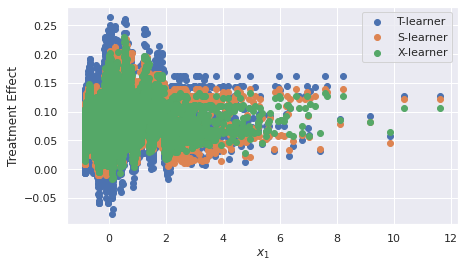

In [81]:
### Comparison plot of the different learners
plt.figure(figsize=(7, 4))

plt.scatter(X_test[:, 1], T_te, label="T-learner")
plt.scatter(X_test[:, 1], S_te, label="S-learner")
plt.scatter(X_test[:, 1], X_te, label="X-learner")
plt.xlabel('$x_1$')
plt.ylabel('Treatment Effect')
plt.legend()
plt.show()

In [0]:
####